In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.groupby(["survived","sex"])["survived"].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df = df.drop(["deck","alive","embark_town"],axis=1)

In [11]:
df.shape

(891, 12)

In [12]:
df["age"] = df["age"].fillna(df["age"].mean())

In [17]:
df = df.dropna()
df.shape

(889, 12)

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [21]:
x = df.drop(["survived"], axis=1)
y = df["survived"]

In [24]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [19]:
mms = MinMaxScaler()
le = LabelEncoder()

In [28]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        x[col] = mms.fit_transform(x[[col]])
    else:
        x[col] = le.fit_transform(x[col])

In [29]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,1.0,1,0.271174,0.125,0.0,0.014151,2,2,1,1.0,0.0
1,0.0,0,0.472229,0.125,0.0,0.139136,0,0,2,0.0,0.0
2,1.0,0,0.321438,0.000,0.0,0.015469,2,2,2,0.0,1.0
3,0.0,0,0.434531,0.125,0.0,0.103644,2,0,2,0.0,0.0
4,1.0,1,0.434531,0.000,0.0,0.015713,2,2,1,1.0,1.0


In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.2,random_state=42)


In [32]:
xtrain.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
708,0.0,0,0.271174,0.000,0.000000,0.295806,2,0,2,0.0,1.0
240,1.0,0,0.367921,0.125,0.000000,0.028213,0,2,2,0.0,0.0
382,1.0,1,0.396833,0.000,0.000000,0.015469,2,2,1,1.0,1.0
792,1.0,0,0.367921,1.000,0.333333,0.135753,2,2,2,0.0,0.0
683,1.0,1,0.170646,0.625,0.333333,0.091543,2,2,0,0.0,0.0


In [33]:
knn_classifier = KNeighborsClassifier()

In [34]:
model = knn_classifier.fit(xtrain,ytrain)

In [35]:
model.score(xtrain,ytrain)

0.8748241912798875

In [38]:
model.score(xtest,ytest)

0.7808988764044944

In [43]:
pred_y = model.predict(xtest)
pred_y

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [48]:
cm = confusion_matrix(ytest,pred_y)
cm

array([[88, 21],
       [18, 51]])

<Axes: >

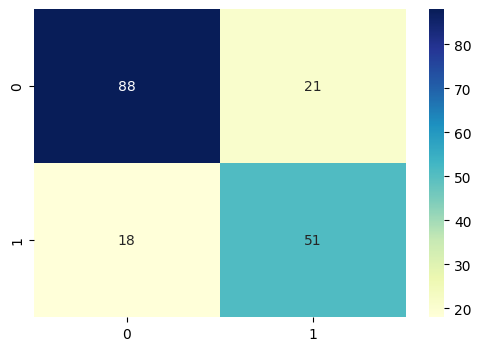

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='YlGnBu')

In [56]:
ytest.value_counts()

survived
0    109
1     69
Name: count, dtype: int64